Importing necessary libraries

In [44]:
import pandas as pd
import seaborn as sns

Loading the training and testing datasets

In [20]:
train = pd.read_csv('playground-series-s4e11/train.csv')

In [21]:
test = pd.read_csv('playground-series-s4e11/test.csv')

In [22]:
train.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


Define the features to be used for training and the target variable

In [23]:
features = ['Work/Study Hours', 'Family History of Mental Illness', 'Working Professional or Student', 'Have you ever had suicidal thoughts ?']
target = 'Depression'

Create a subset of the train and test dataset that only contains the selected features and the target

In [24]:
train = train[features+[target]].copy()
test = test[features+["id"]].copy()

Function to replace categorical values with numeric values (for model compatibility)

In [25]:
def impute(df):
    df.loc[:, 'Family History of Mental Illness'] = df['Family History of Mental Illness'].replace({'Yes': 1, 'No': 0})
    df.loc[:, 'Working Professional or Student'] = df['Working Professional or Student'].replace({'Working Professional': 1, 'Student': 0})
    df.loc[:, 'Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].replace({'Yes': 1, 'No': 0})

Apply the imputation function to the training dataset

In [26]:
impute(train)

In [33]:
train

,Work/Study Hours,Family History of Mental Illness,Working Professional or Student,Have you ever had suicidal thoughts ?,Depression
0,1.0,0,1,0,0
1,7.0,0,1,1,1
2,3.0,0,0,1,1
3,10.0,1,1,1,1
4,9.0,1,1,1,0
...,...,...,...,...,...
140695,2.0,1,1,0,1
140696,6.0,1,1,1,0
140697,4.0,0,1,0,0
140698,10.0,0,1,1,0


In [27]:
impute(test)

Visualize the correlation between the features (after converting them to numeric) using a heatmap

<Axes: >

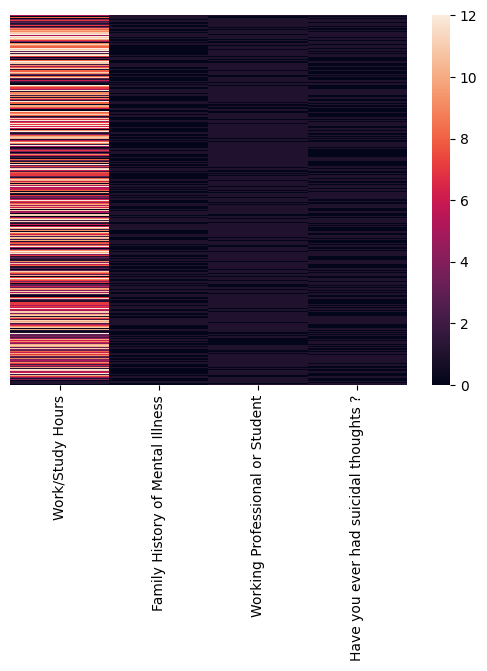

In [35]:
sns.heatmap(train[features].astype(float), yticklabels=False)

Split the training dataset into training and test sets (using 33% of data for testing)

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train, x_test, y_train, y_test = train_test_split(train[features], train['Depression'], test_size=0.33, random_state=69)

Check the distribution of the target variable (Depression) in the training set to understand any class imbalance

In [39]:
print(y_train.value_counts())

Depression
0    77142
1    17127
Name: count, dtype: int64


The data is highly skewed to "0" output

Train a Random Forest Classifier on the training data (with 3 estimators)

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rfc = RandomForestClassifier(n_estimators=3)
rfc.fit(train[features], train[target])

RandomForestClassifier(n_estimators=3)

Retrieve the feature importances after the model is trained (to understand which features are most influential)

In [43]:
rfc.feature_importances_

array([0.0722508 , 0.00151923, 0.63034909, 0.29588087])

The Profession of the person is a highly influencial factor for the determination of the target value, followed considerably by the occurrence of the thought of suicide.

Predict the target variable (Depression) for the test dataset

In [ ]:
predDepress = rfc.predict(test[features])

Saving predictions in a .csv file

In [ ]:
output = pd.DataFrame({"id" : test.id, 'Depression': predDepress})
output.to_csv('submission.csv', index = False)

***